<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Blogs/BorealisBayesianParameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bayesian machine learning: parameter view

This blog contains code that accompanies the Borealis AI blog on Bayesian methods for machine learning (parameter view).  Contact udlbookmail@gmail.com if you find any problems.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from scipy.stats import multivariate_normal

Create data for linear model.   One dimensional inputs and one dimensional outputs.  Ones appended to inputs to account for intercepts.

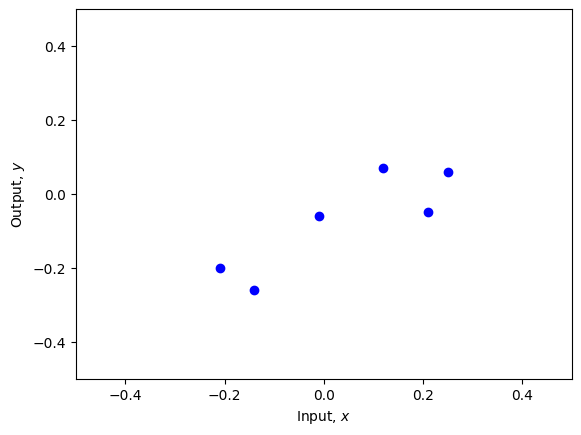

In [ ]:
X = np.array([[-0.21,-0.14,-0.01,0.12, 0.25, 0.21],[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]])
y = np.array([-0.20, -0.26, -0.06, 0.07, 0.06, -0.05])

fig,ax = plt.subplots()
ax.plot(X[0,:],y,'bo')
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Input, $x$')
ax.set_ylabel('Output, $y$')
plt.show()

# Maximum likelihood solution

In [ ]:
# Find parameters for maximum likelihood solution
phi_ml = np.linalg.inv(X @ X.transpose())@X@y

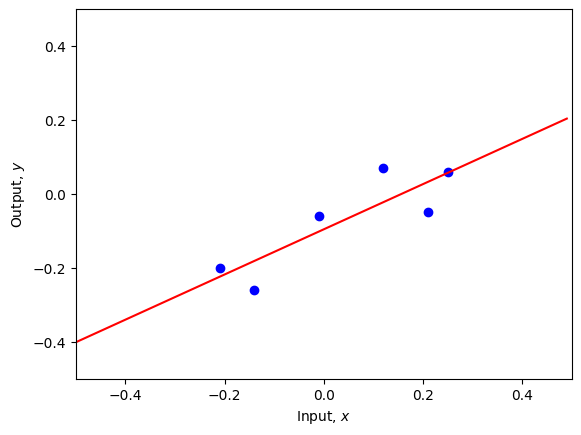

In [ ]:
# Create x data for plotting line
x_plot = np.atleast_2d(np.arange(-0.5,0.5, 0.01))
x_plot = np.concatenate([x_plot, np.ones_like(x_plot)],axis=0)
# Run model
y_plot  = x_plot.transpose()@phi_ml

fig,ax = plt.subplots()
ax.plot(X[0,:],y,'bo')
ax.plot(x_plot[0,:], y_plot, 'r-')
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Input, $x$')
ax.set_ylabel('Output, $y$')
plt.show()

# MAP Solution

In [ ]:
# Helper function to draw 2D Gaussian
def draw_gaussian_prior(mean, covariance, title, n_contour, filename=None):
  # Define pretty colormap
  my_colormap_vals_hex =('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
  my_colormap_vals_dec = np.array([int(element,base=16) for element in my_colormap_vals_hex])
  r = np.floor(my_colormap_vals_dec/(256*256))
  g = np.floor((my_colormap_vals_dec - r *256 *256)/256)
  b = np.floor(my_colormap_vals_dec - r * 256 *256 - g * 256)
  my_colormap = ListedColormap(np.vstack((r,g,b)).transpose()/255.0)

  # Make grid of intercept/slope values to plot
  intercepts_mesh, slopes_mesh = np.meshgrid(np.arange(-1.0,1.0,0.005), np.arange(-1.0,1.0,0.005))
  slopes_intercepts = np.dstack((slopes_mesh, intercepts_mesh))
  # Evaluate pdf for every set of parameters
  distribution = multivariate_normal(np.squeeze(mean), covariance)
  prob_mesh = distribution.pdf(slopes_intercepts)

  fig,ax = plt.subplots()
  fig.set_size_inches(8,8)
  ax.contourf(slopes_mesh,intercepts_mesh,prob_mesh,256,cmap=my_colormap)
  ax.contour(slopes_mesh,intercepts_mesh,prob_mesh,n_contour,colors=['#80808080'])
  ax.set_xlim([-1,1])
  ax.set_ylim([-1,1])
  ax.set_xlabel('Slope, $\phi_0$')
  ax.set_ylabel('Intercept, $\phi_1$')
  ax.set_title(title)

  if filename is not None:
    plt.savefile(filename,format='svg')
  plt.show()

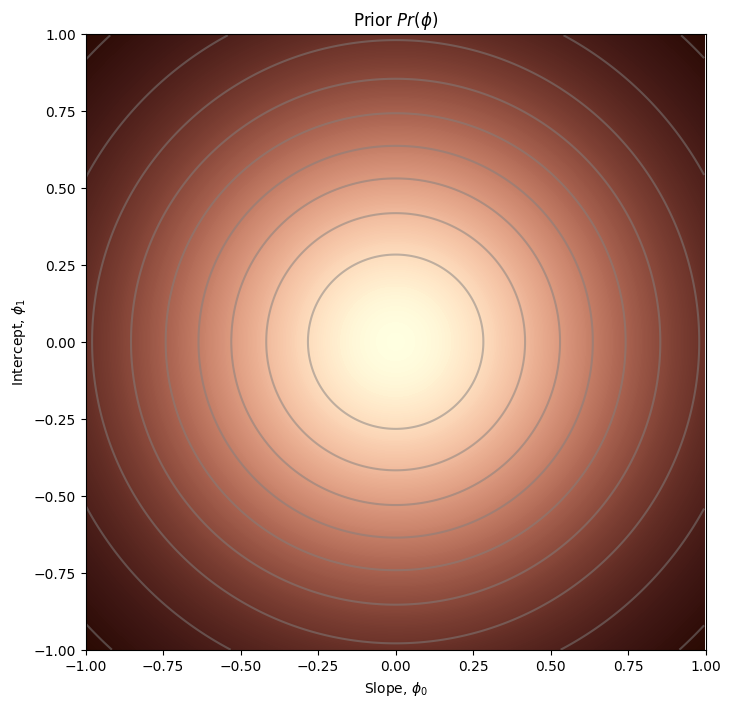

In [ ]:
# Define a prior over the parameters and draw the prior
sigma_sq_p = 0.4
sigma_sq_n = 0.005
prior_mean = np.zeros((2,1))
prior_cov = sigma_sq_p * np.identity(2)
draw_gaussian_prior(prior_mean, prior_cov, title='Prior $Pr(\phi)$',n_contour = 10)

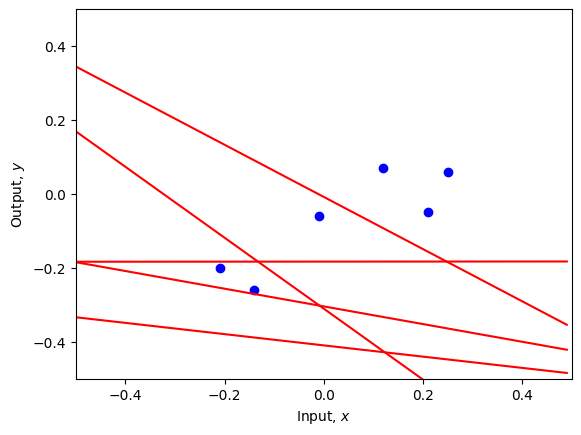

In [ ]:
# Draw some samples from the prior
np.random.seed(9)
slopes, intercepts = np.random.multivariate_normal(np.squeeze(prior_mean), prior_cov, 5).T

# Create x data for plotting line
x_plot = np.atleast_2d(np.arange(-0.5,0.5, 0.01))
x_plot = np.concatenate([x_plot, np.ones_like(x_plot)],axis=0)

fig,ax = plt.subplots()
ax.plot(X[0,:],y,'bo')
for i in range(slopes.shape[0]):
  y_plot = x_plot.transpose() @ np.array([[slopes[i]], [intercepts[i]]])
  ax.plot(x_plot[0,:], y_plot, 'r-')

ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Input, $x$')
ax.set_ylabel('Output, $y$')
plt.show()


In [ ]:
# Find parameters for maximum likelihood solution
phi_map = np.linalg.inv(X @ X.transpose()+(sigma_sq_n / sigma_sq_p)*np.identity(2))@X@y

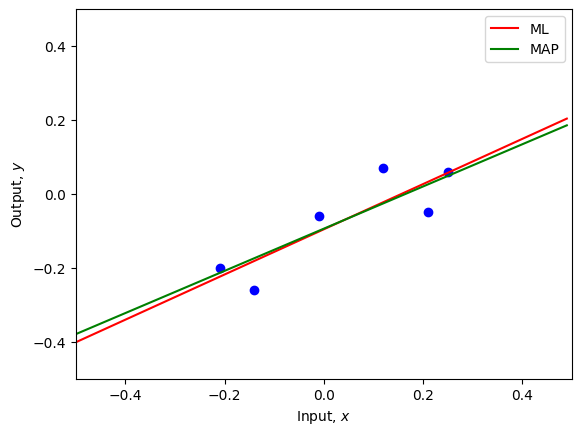

In [ ]:
# Create x data for plotting line
x_plot = np.atleast_2d(np.arange(-0.5,0.5, 0.01))
x_plot = np.concatenate([x_plot, np.ones_like(x_plot)],axis=0)
# Run models
y_plot_ml  = x_plot.transpose()@phi_ml
y_plot_map  = x_plot.transpose()@phi_map

fig,ax = plt.subplots()
ax.plot(X[0,:],y,'bo')
ax.plot(x_plot[0,:], y_plot_ml, 'r-', label='ML')
ax.plot(x_plot[0,:], y_plot_map, 'g-', label='MAP')
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Input, $x$')
ax.set_ylabel('Output, $y$')
ax.legend()
plt.show()

# Bayesian approach

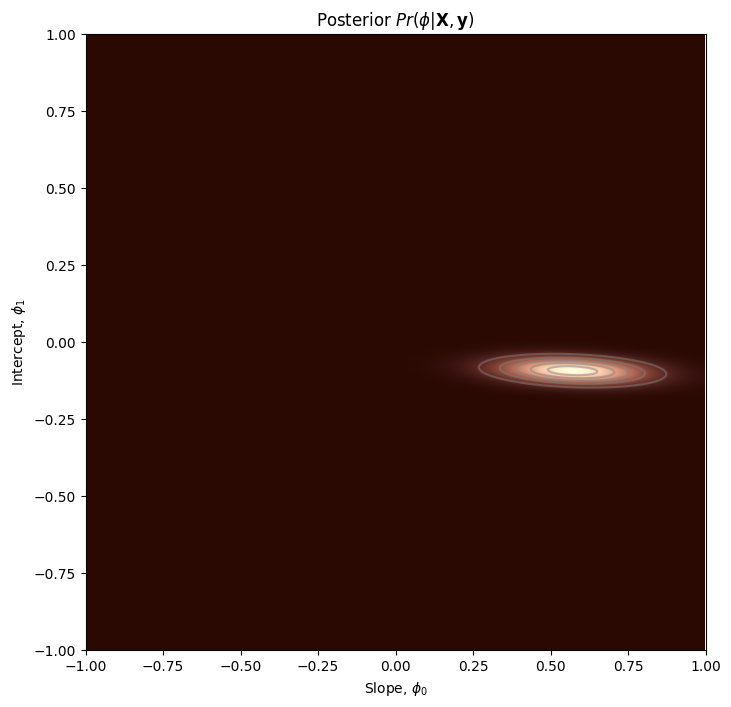

In [ ]:
# Compute posterior distribution over parameters
post_mean = np.linalg.inv(X @ X.transpose()+(sigma_sq_n / sigma_sq_p)*np.identity(2))@X@y
post_cov =  sigma_sq_n * np.linalg.inv(X @ X.transpose()+(sigma_sq_n / sigma_sq_p)*np.identity(2))
draw_gaussian_prior(post_mean, post_cov, title='Posterior $Pr(\phi|\mathbf{X},\mathbf{y})$', n_contour=5)

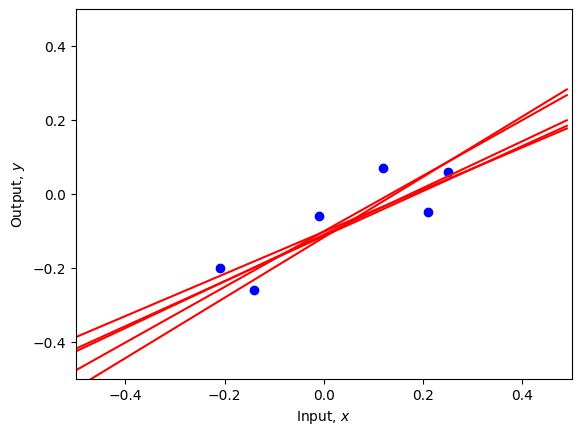

In [ ]:
# Draw some samples from the posterior
np.random.seed(9)
slopes, intercepts = np.random.multivariate_normal(np.squeeze(post_mean), post_cov, 5).T

# Create x data for plotting line
x_plot = np.atleast_2d(np.arange(-0.5,0.5, 0.01))
x_plot = np.concatenate([x_plot, np.ones_like(x_plot)],axis=0)

fig,ax = plt.subplots()
ax.plot(X[0,:],y,'bo')
for i in range(slopes.shape[0]):
  y_plot = x_plot.transpose() @ np.array([[slopes[i]], [intercepts[i]]])
  ax.plot(x_plot[0,:], y_plot, 'r-')

ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Input, $x$')
ax.set_ylabel('Output, $y$')
plt.show()

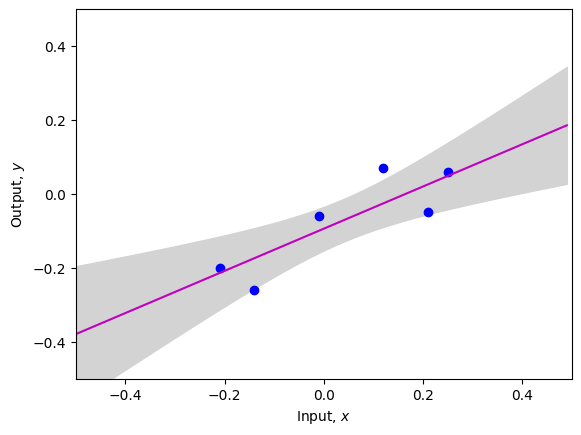

In [ ]:
# Create x data for plotting line
x_plot = np.atleast_2d(np.arange(-0.5,0.5, 0.01))
x_plot = np.concatenate([x_plot, np.ones_like(x_plot)],axis=0)
# Run models
# Make predictions for mean and variance
inv_term = np.linalg.inv(X @ X.transpose()+(sigma_sq_n / sigma_sq_p)*np.identity(2))
y_plot_bayes  = x_plot.transpose() @ inv_term @ X @ y
y_plot_var = np.zeros_like(y_plot_bayes)
for i in range(x_plot.shape[1]):
  y_plot_var[i] = sigma_sq_n  * x_plot[:,i] @ inv_term @ x_plot[:,i]

fig,ax = plt.subplots()
ax.plot(X[0,:],y,'bo')
ax.plot(x_plot[0,:], y_plot_bayes, 'm-')
ax.fill_between(x_plot[0,:], y_plot_bayes-2*np.sqrt(y_plot_var), y_plot_bayes+2*np.sqrt(y_plot_var), color='lightgray')
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Input, $x$')
ax.set_ylabel('Output, $y$')
plt.show()

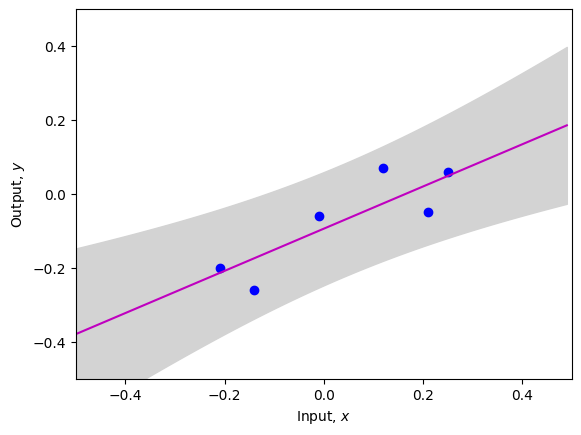

In [ ]:
# Create x data for plotting line
x_plot = np.atleast_2d(np.arange(-0.5,0.5, 0.01))
x_plot = np.concatenate([x_plot, np.ones_like(x_plot)],axis=0)
# Run models
# Make predictions for mean and variance
inv_term = np.linalg.inv(X @ X.transpose()+(sigma_sq_n / sigma_sq_p)*np.identity(2))
y_plot_bayes  = x_plot.transpose() @ inv_term @ X @ y
y_plot_var = np.zeros_like(y_plot_bayes)
for i in range(x_plot.shape[1]):
  y_plot_var[i] = sigma_sq_n  * x_plot[:,i] @ inv_term @ x_plot[:,i] + sigma_sq_n

fig,ax = plt.subplots()
ax.plot(X[0,:],y,'bo')
ax.plot(x_plot[0,:], y_plot_bayes, 'm-')
ax.fill_between(x_plot[0,:], y_plot_bayes-2*np.sqrt(y_plot_var), y_plot_bayes+2*np.sqrt(y_plot_var), color='lightgray')
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Input, $x$')
ax.set_ylabel('Output, $y$')
plt.show()